In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/scattering/domain_wall_scattering/src')

In [2]:
from DynamicsDefinition import Hamiltonian
from model_building import initialize_system
from dynamics import time_evolution, calculate_expectation_values
from plots import plot_expectations, plot_heatmap, plot_correlation_heatmap

In [61]:
N = 5
lmd = 0.02272
J = -0.5
V = 0.2
V_index = 3
state_dictionary = {'0':1}
ti = 0
tf = 250
nstep = 1000

initial_state, final_state, reg_size = initialize_system(state_dictionary, N, encoding='domain_wall', one_step=False)

H = Hamiltonian(N, lmd, J, V, V_index)

simulation = time_evolution(H, initial_state, ti, tf, nstep)

exp_values = calculate_expectation_values(simulation, H)

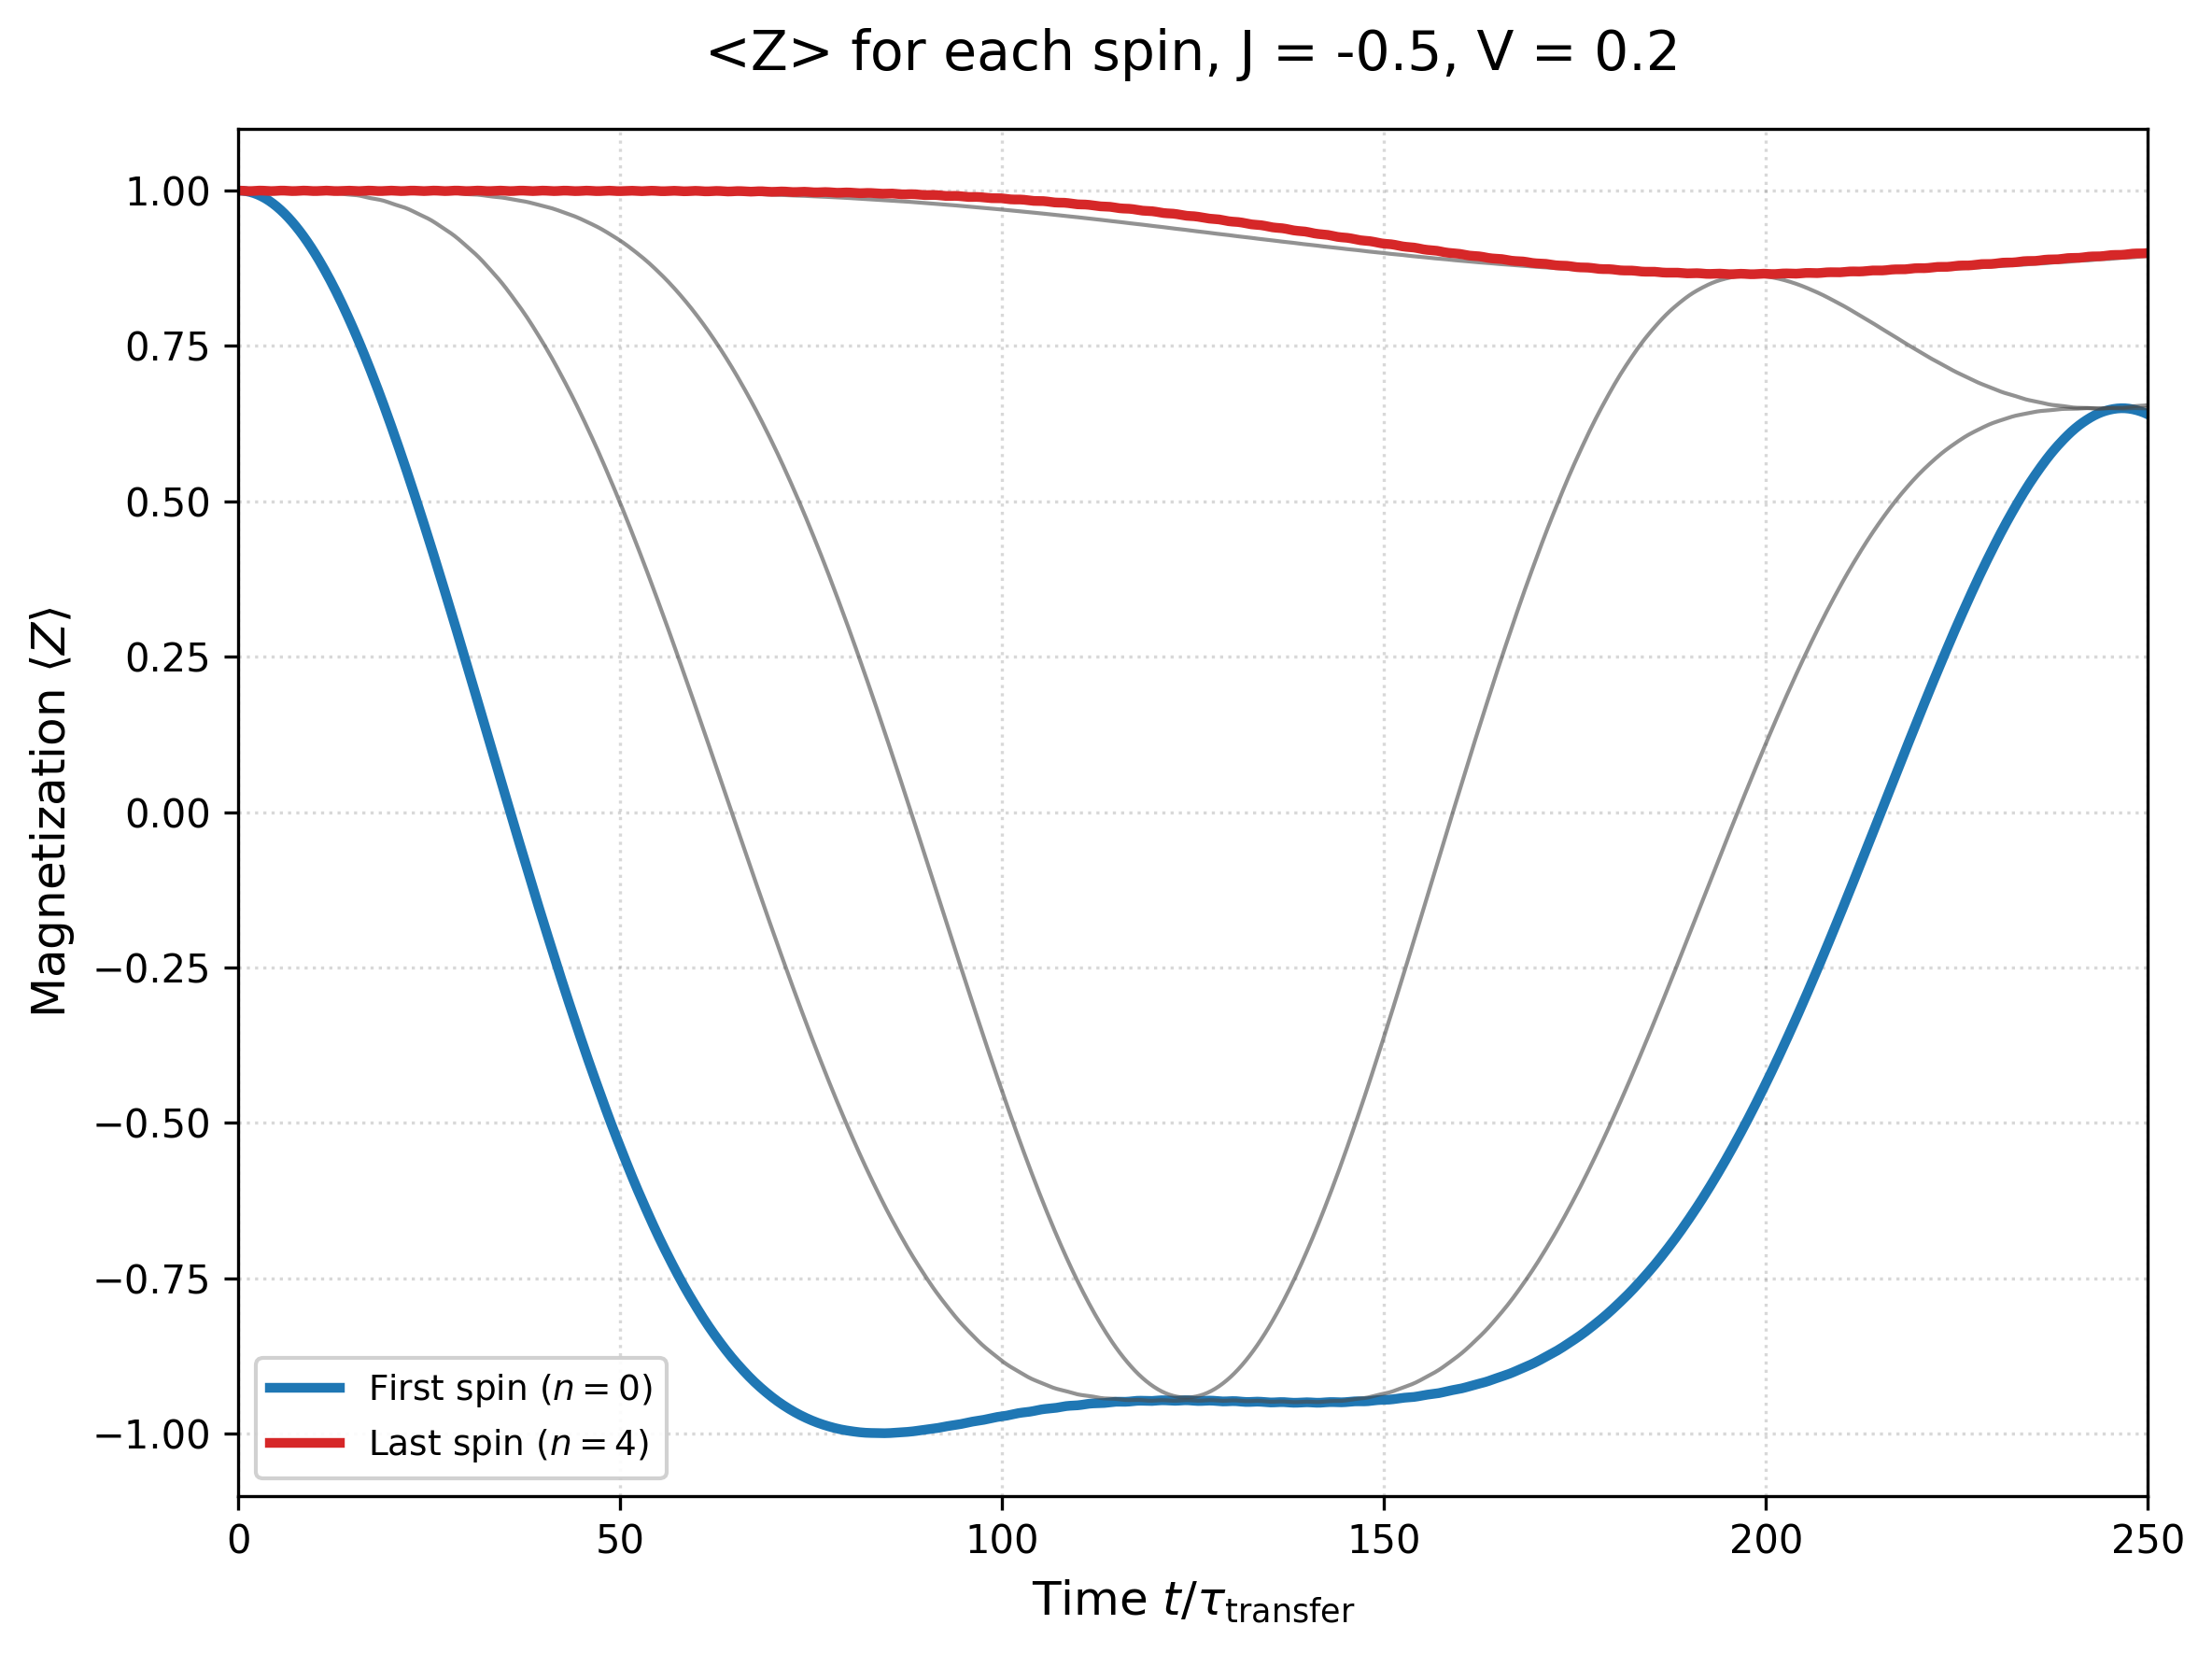

In [62]:
plot_expectations(exp_values['Sz'], N, J, V, ti, tf)

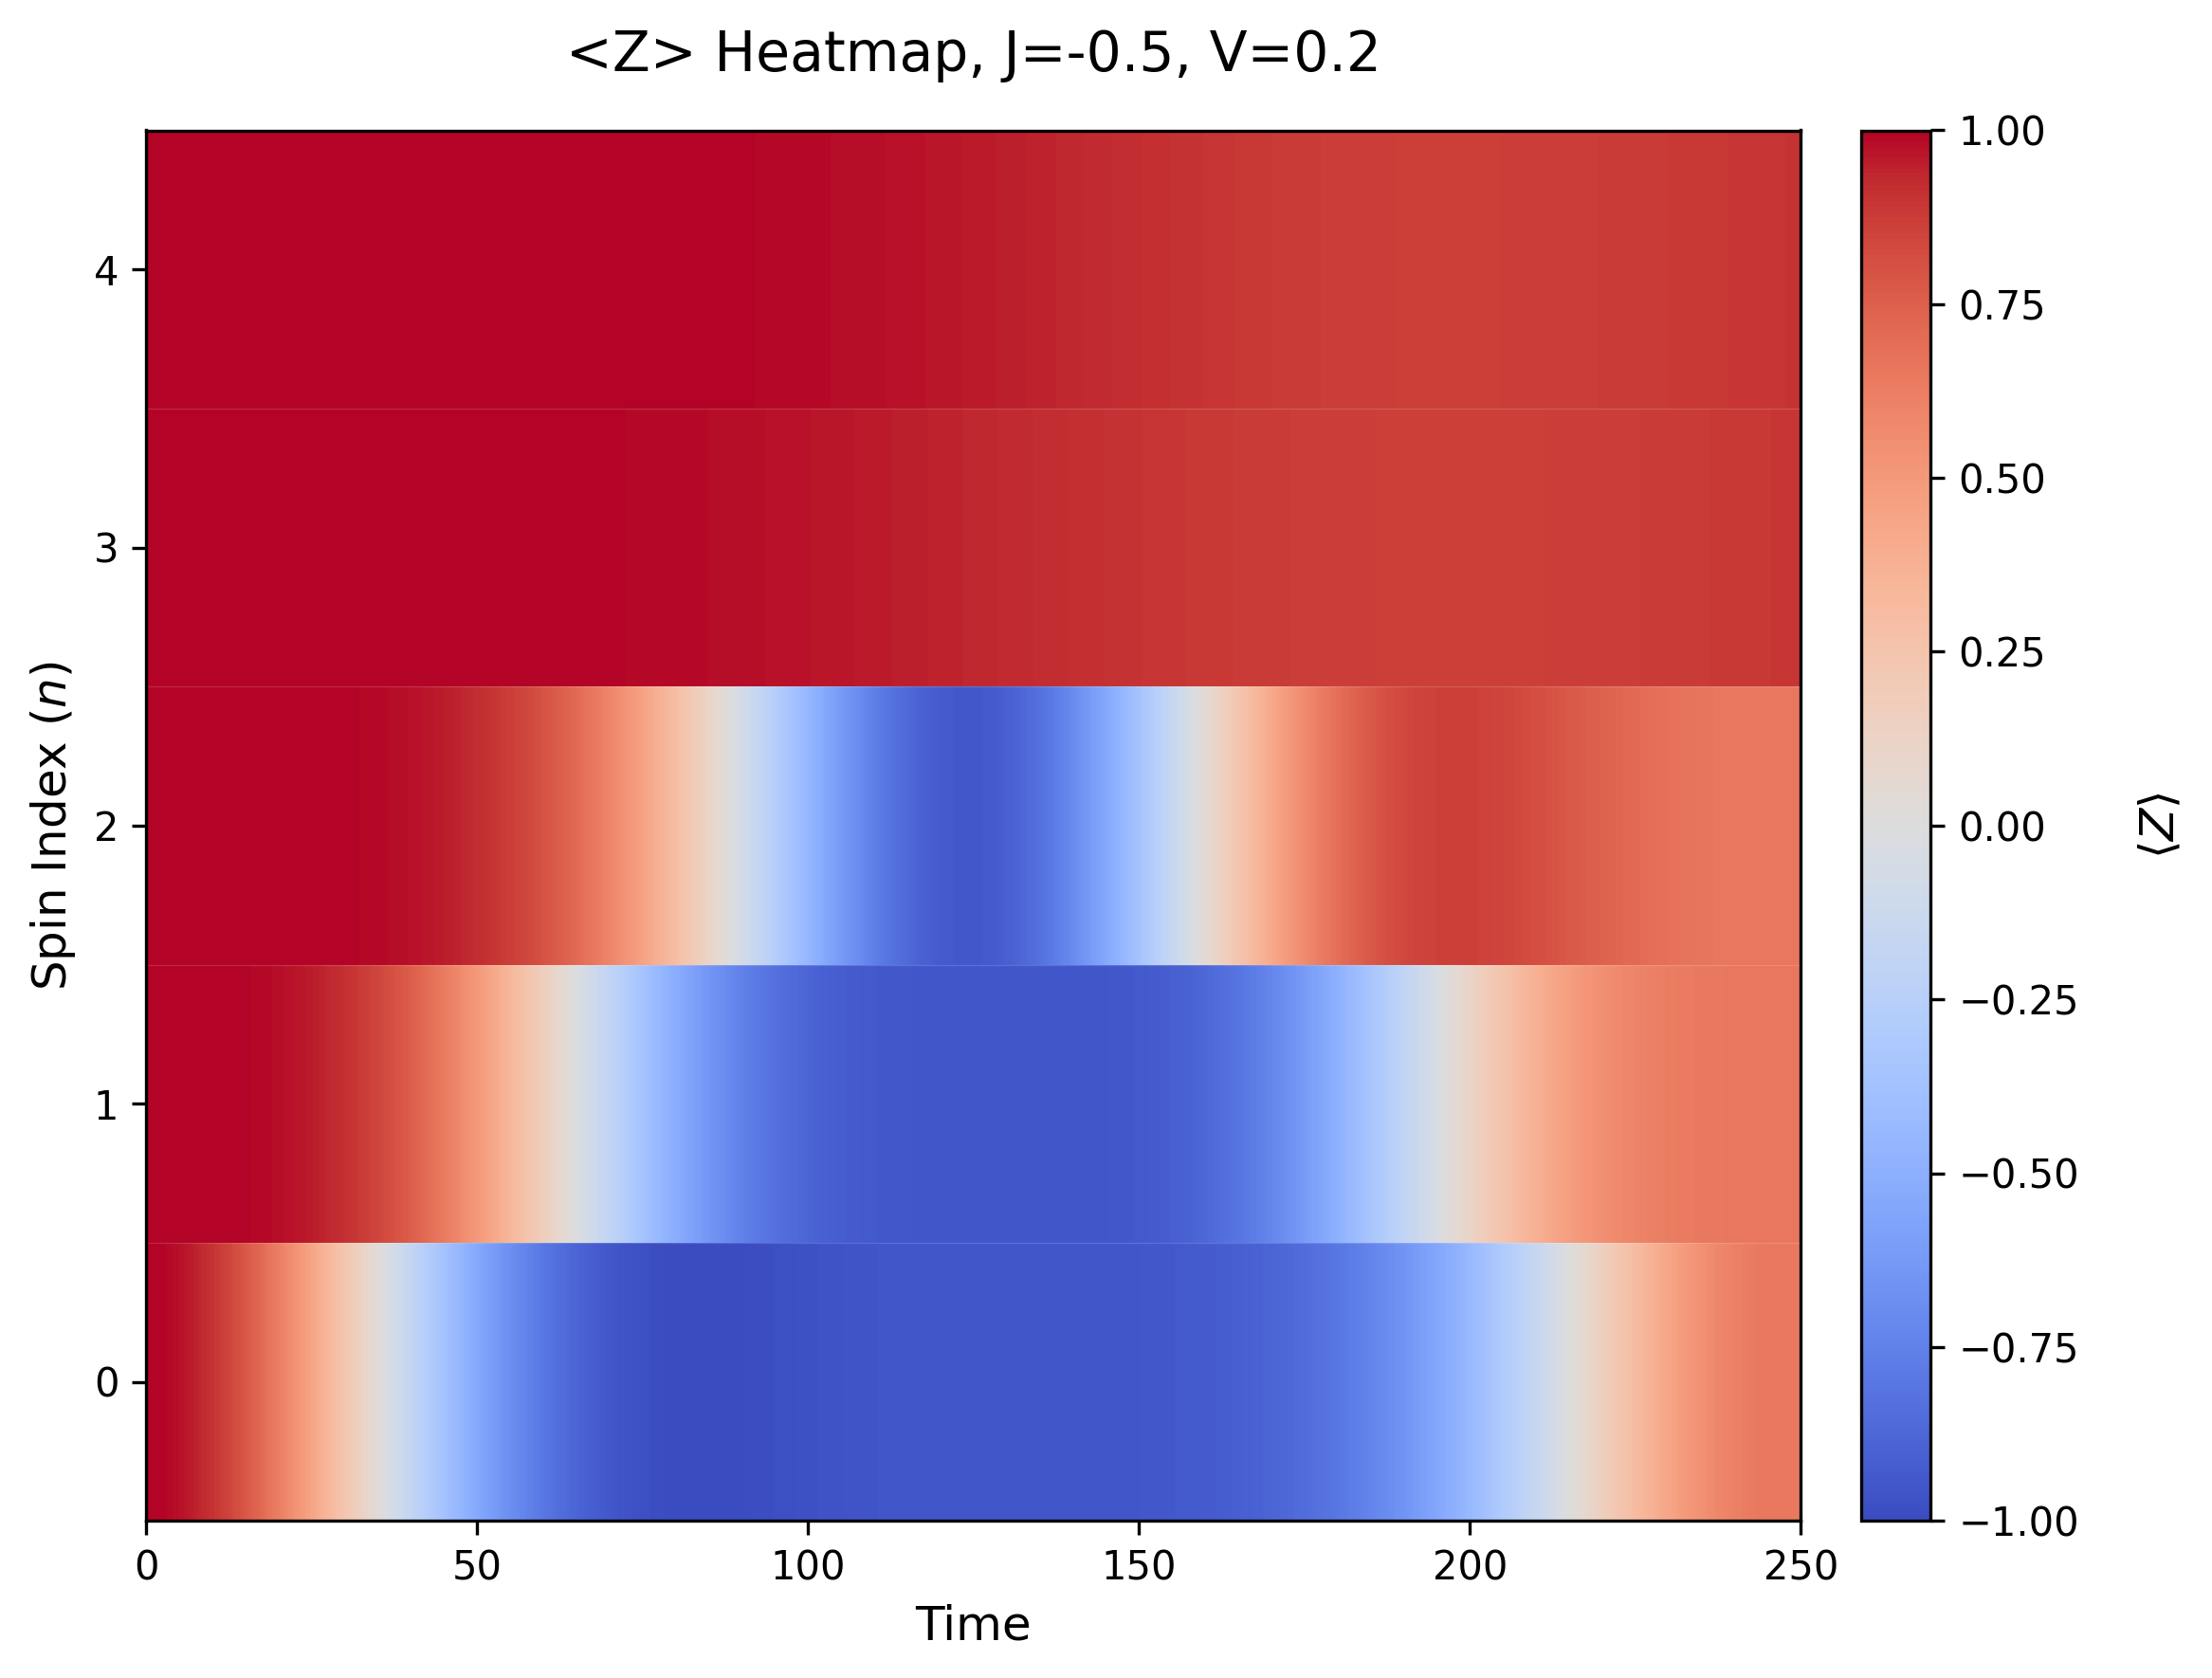

In [63]:
plot_heatmap(exp_values['Sz'], N, J, V, ti, tf)

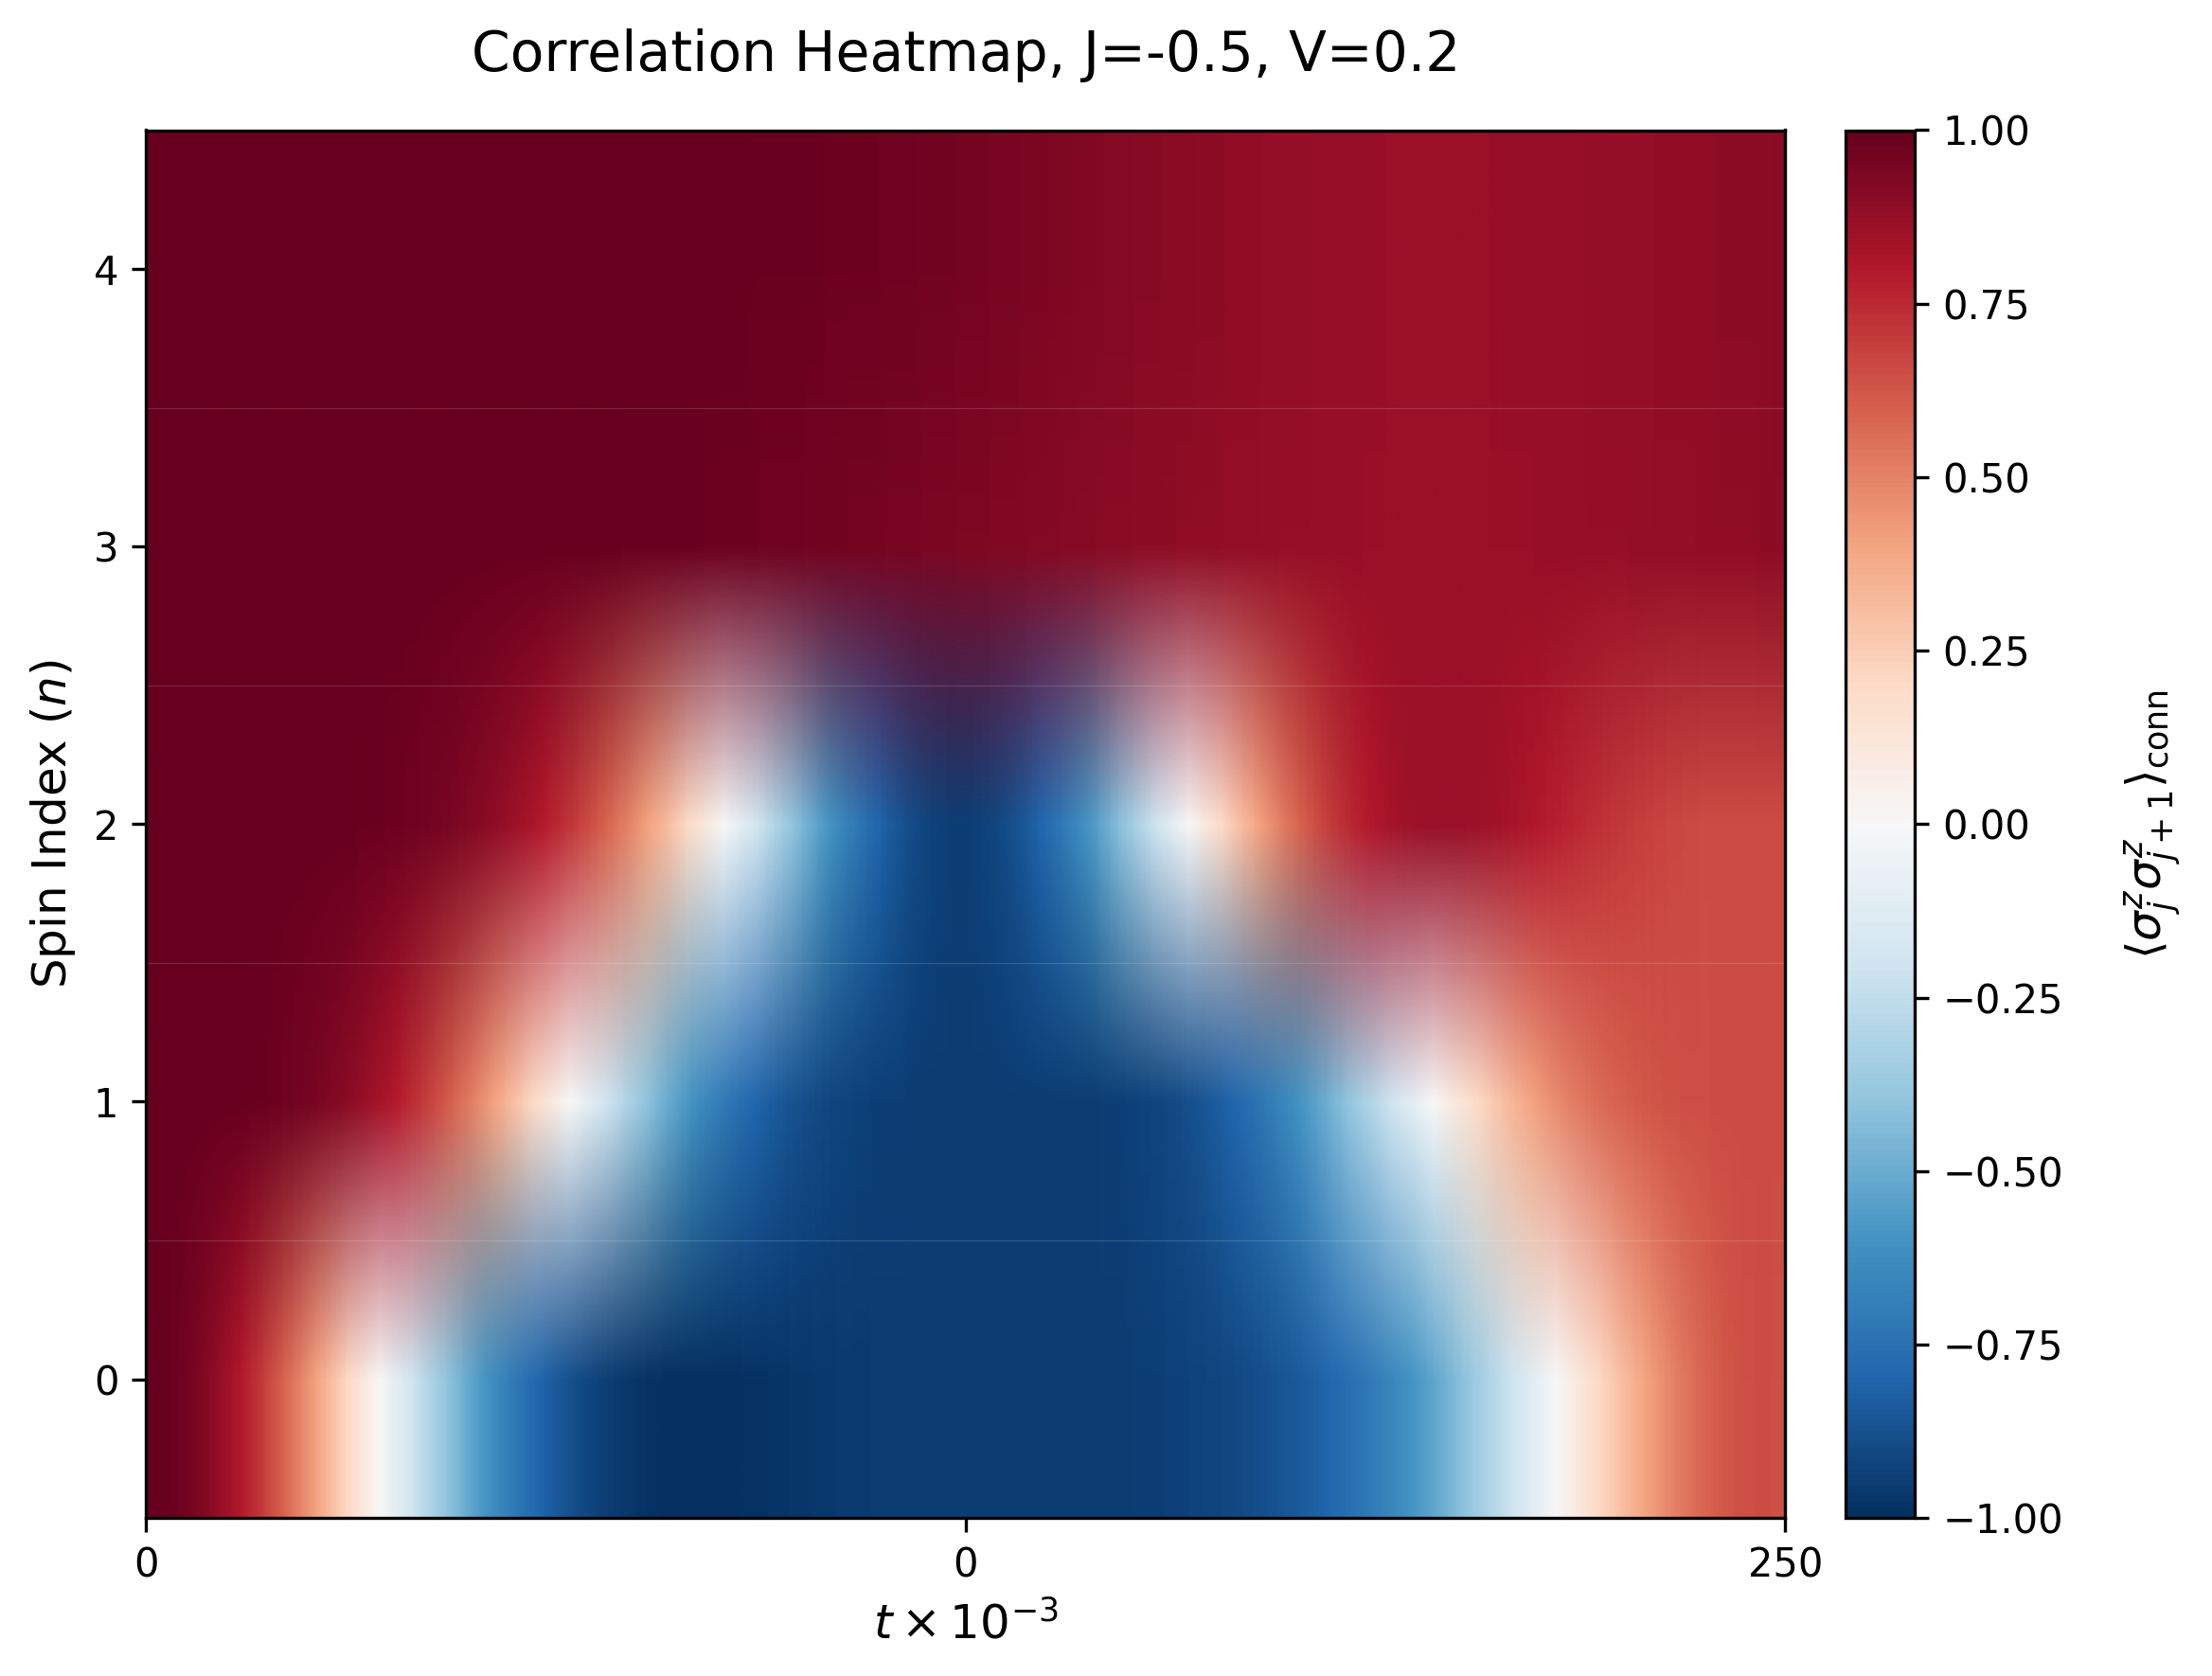

In [64]:
plot_correlation_heatmap(exp_values['Sz'], N, J, V, ti, tf)

In [73]:
N = 5
V_index = 3
state_dictionary = {'0':1}
ti = 0
tf = 350
nstep = 1000

j_min = -0.1
j_max = -1
j_vals = 10

v_min = 0
v_max = 0.8
v_vals = 101

lmd = 0.02272
J = np.linspace(j_min, j_max, j_vals)
V = np.linspace(v_min, v_max, v_vals)

initial_state, final_state, reg_size = initialize_system(state_dictionary, N, encoding='domain_wall', one_step=False)

min_z_exp_last_qubit = np.zeros((j_vals, v_vals))

for index_j, j in enumerate(J):
    print(j)
    for index_v, v in enumerate(V): 
        H = Hamiltonian(N, lmd, j, v, V_index)
        simulation = time_evolution(H, initial_state, ti, tf, nstep)
        exp_values = calculate_expectation_values(simulation, H)
        min_z_exp_last_qubit[index_j, index_v] = min(exp_values['Sz'][:,-1])



-0.1
-0.2
-0.30000000000000004
-0.4
-0.5
-0.6
-0.7000000000000001
-0.8
-0.9
-1.0


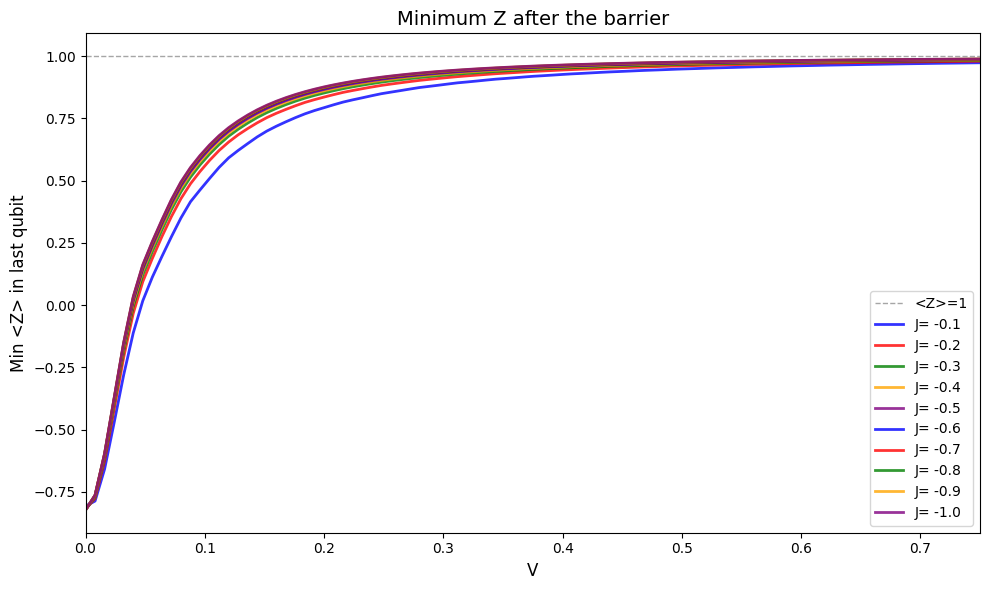

In [74]:
# Assuming your array is called 'data' with shape (m, n)
# where m = first index, n = second index

# Create sample data (replace this with your actual array)
data = min_z_exp_last_qubit  # 5 lines, 10 x-points

# Create x values (using second index)
x = V # or use specific x values if you have them

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for better distinction
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Add dashed horizontal line at y=1
ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='<Z>=1')

# Plot each line as solid lines
for i in range(data.shape[0]):
    color = colors[i % len(colors)]
    ax.plot(x, data[i, :], 
            label=f'J= {J[i]:.1f}', 
            color=color, 
            linewidth=2,           # Solid line with thickness 2
            linestyle='-',         # Explicitly set to solid line
            marker='',             # Remove markers for clean solid lines
            alpha=0.8)             # Slight transparency

# CONFIGURE AXIS BOUNDS - Adjust these values as needed
# Set x-axis limits

ax.set_xlim(0, 0.75)

# Set y-axis limits

# Customize the plot
ax.set_xlabel('V', fontsize=12)
ax.set_ylabel('Min <Z> in last qubit', fontsize=12)
ax.set_title('Minimum Z after the barrier', fontsize=14)
ax.legend(fontsize=10)


plt.tight_layout()
plt.show()

In [56]:
print(data[0])

[-0.80729888 -0.56878501 -0.11199123  0.15519431  0.34975798  0.48548602
  0.59116121  0.66202853  0.71818047  0.76051795  0.79259804  0.82010839
  0.84067222  0.8579997   0.87352592  0.88525128  0.89589063  0.90536853
  0.91287149  0.91997446  0.92611748  0.93129185  0.93631346  0.94052115
  0.94427911  0.94796644  0.95095235  0.95379554  0.95654938  0.95879484
  0.96102165  0.96308139  0.96486834  0.96663661  0.96822993  0.9696781
  0.97108777  0.97233002  0.9735243   0.97468654  0.97569867  0.97667927
  0.97764109  0.97847617  0.97930555  0.98007475  0.98078627  0.98148699
  0.98212128  0.98274909  0.98333127  0.98387055  0.98441589  0.98492598
  0.98537405  0.98583648  0.98629356  0.9866776   0.98707633  0.98747338
  0.98782089  0.98817971  0.98851303  0.98883346  0.9891281   0.98943019
  0.98968635  0.98996385  0.99021841  0.99045963  0.99073069  0.99092601
  0.99117089  0.99137725  0.99157534  0.99177112  0.99195999  0.99216225
  0.99234096  0.99249903  0.99266007  0.99283147  0.